<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/D%C3%BCnya%C3%9Clkeleri%C4%B0statistikleriAnalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🌍 Dünya Bankası Veri Analizi Projesi
Bu proje, Dünya Bankası'nın 2015 yılına ait ülke ve bölge verilerini kullanarak ekonomik ve sosyal göstergeleri analiz eder.
Kullanılan teknikler: Veri temizleme, keşifsel veri analizi (EDA), görselleştirme.

📌 Projenin Amacı
Ülkelerin GSYİH, nüfus, okuryazarlık oranı, internet kullanımı gibi metrikler arasındaki ilişkileri incelemek.

İlginç trendleri ve korelasyonları ortaya çıkarmak.

In [ ]:
import zipfile

# Zip dosyasının yolunu belirtin
zip_path = '/content/archive.zip'  # Dosya adını doğru şekilde yazın

# Zip dosyasını açma
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

Dosyaları Kontrol Etme
Zip dosyası açıldıktan sonra, içindeki dosyaları kontrol edin:

In [ ]:
import os

# Dosyaları listeleme
extracted_files = os.listdir('/content/')
print(extracted_files)

['.config', 'archive.zip', '2015 World Bank data by nation and region.xls', 'sample_data']


In [ ]:
import pandas as pd

# Excel dosyasının yolunu belirtin
excel_path = '/content/2015 World Bank data by nation and region.xls'  # Dosya adını doğru şekilde yazın

# Excel dosyasını okuma
df = pd.read_excel(excel_path)

# Veriyi görüntüleme
print(df.head())

  Country Name Region Code Country Code  GDP, PPP (current international $)  \
0        Aruba          MA          ABW                                 NaN   
1      Andorra          EU          AND                                 NaN   
2  Afghanistan          ME          AFG                        6.291267e+10   
3       Angola          AF          AGO                        1.844377e+11   
4      Albania          EU          ALB                        3.266324e+10   

   Population, total  Population CGR 1960-2015  \
0           103889.0                  0.011897   
1            70473.0                  0.030622   
2         32526562.0                  0.023646   
3         25021974.0                  0.028724   
4          2889167.0                  0.010702   

   Internet users (per 100 people)  Popltn Largest City % of Urban Pop  \
0                        88.661227                                 NaN   
1                        96.910000                                 NaN   
2 

Veriyi Analiz Etme
Excel dosyasını başarıyla okuduktan sonra, veriyi analiz edebilirsiniz. Örneğin:

Eksik Verileri Kontrol Etme:

In [ ]:
print(df.isnull().sum())

Country Name                                                      0
Region Code                                                      54
Country Code                                                      0
GDP, PPP (current international $)                               50
Population, total                                                 2
Population CGR 1960-2015                                          6
Internet users (per 100 people)                                  16
Popltn Largest City % of Urban Pop                               72
2014 Life expectancy at birth, total (years)                     19
Literacy rate, adult female (% of females ages 15 and above)    108
Exports of goods and services (% of GDP)                         84
dtype: int64


Temel İstatistikleri Görüntüleme:

In [ ]:
print(df.describe())

       GDP, PPP (current international $)  Population, total  \
count                        2.140000e+02       2.620000e+02   
mean                         4.758335e+12       2.970610e+08   
std                          1.370365e+13       9.376648e+08   
min                          2.089545e+08       9.916000e+03   
25%                          3.015109e+10       1.464251e+06   
50%                          1.679587e+11       1.009667e+07   
75%                          1.584579e+12       5.469198e+07   
max                          1.136535e+14       7.346633e+09   

       Population CGR 1960-2015  Internet users (per 100 people)  \
count                258.000000                       248.000000   
mean                   0.018255                        47.556571   
std                    0.011218                        27.691717   
min                   -0.001666                         1.083733   
25%                    0.009471                        21.932051   
50%            

Görselleştirme:



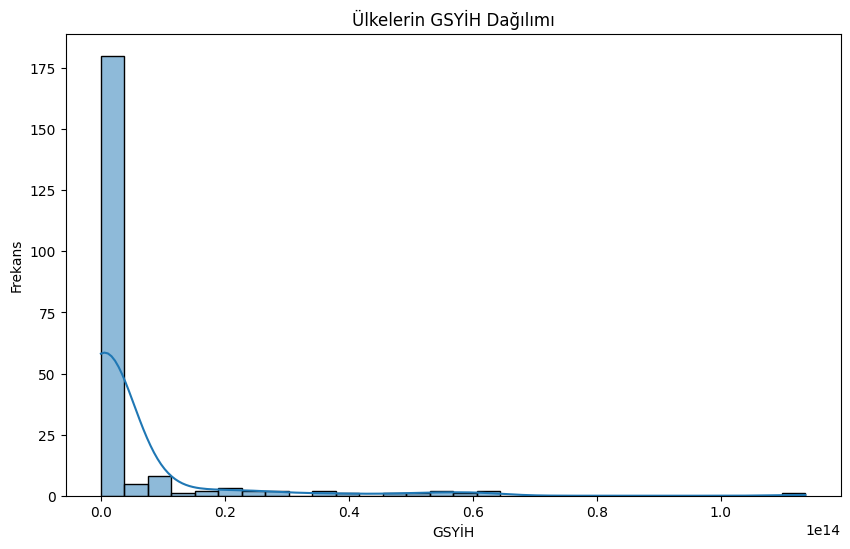

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Örnek: Ülkelerin GSYİH dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df['GDP, PPP (current international $)'], bins=30, kde=True)
plt.title("Ülkelerin GSYİH Dağılımı")
plt.xlabel("GSYİH")
plt.ylabel("Frekans")
plt.show()

Sütun İsimlerini Kontrol Etme
Veri setinizin sütun isimlerini kontrol ederek 'GDP' sütununun olup olmadığını veya farklı bir isimle kaydedilip kaydedilmediğini inceleyin:

In [ ]:
print(df.columns)

Index(['Country Name', 'Region Code', 'Country Code',
       'GDP, PPP (current international $)', 'Population, total',
       'Population CGR 1960-2015', 'Internet users (per 100 people)',
       'Popltn Largest City % of Urban Pop',
       '2014 Life expectancy at birth, total (years)',
       'Literacy rate, adult female (% of females ages 15 and above)',
       'Exports of goods and services (% of GDP)'],
      dtype='object')


Adım 4: Veriyi Temizleme ve Analiz
Veriyi temizleyerek analizlerinizi daha detaylı hale getirebilirsiniz.
Örneğin:

Eksik Verileri Doldurma veya Kaldırma:

Yalnızca sayısal sütunlar üzerinde işlem yapmak için, sayısal sütunları seçin:

In [ ]:
# Sayısal sütunları seçme
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
print(numeric_columns)

Index(['GDP, PPP (current international $)', 'Population, total',
       'Population CGR 1960-2015', 'Internet users (per 100 people)',
       'Popltn Largest City % of Urban Pop',
       '2014 Life expectancy at birth, total (years)',
       'Literacy rate, adult female (% of females ages 15 and above)',
       'Exports of goods and services (% of GDP)'],
      dtype='object')


Eksik Verileri Sayısal Sütunlar İçin Doldurma
Yalnızca sayısal sütunlar için eksik verileri doldurun:

In [ ]:
# Sayısal sütunlarda eksik verileri ortalama ile doldurma
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Eksik verileri kaldırma (opsiyonel)
df.dropna(inplace=True)

In [ ]:
# Temizlenmiş veriyi kontrol etme
print(df.isnull().sum())

Country Name                                                    0
Region Code                                                     0
Country Code                                                    0
GDP, PPP (current international $)                              0
Population, total                                               0
Population CGR 1960-2015                                        0
Internet users (per 100 people)                                 0
Popltn Largest City % of Urban Pop                              0
2014 Life expectancy at birth, total (years)                    0
Literacy rate, adult female (% of females ages 15 and above)    0
Exports of goods and services (% of GDP)                        0
dtype: int64


Temel İstatistikleri Görüntüleme
Veri setinizin temel istatistiklerini inceleyelim:



In [ ]:
print(df.describe())

       GDP, PPP (current international $)  Population, total  \
count                        2.100000e+02       2.100000e+02   
mean                         1.425130e+12       3.455337e+07   
std                          2.328485e+12       1.352803e+08   
min                          2.089545e+08       9.916000e+03   
25%                          3.183890e+10       8.557602e+05   
50%                          1.705870e+11       6.365811e+06   
75%                          2.536725e+12       2.318352e+07   
max                          1.952435e+13       1.371220e+09   

       Population CGR 1960-2015  Internet users (per 100 people)  \
count                210.000000                       210.000000   
mean                   0.018641                        47.589178   
std                    0.011849                        27.836843   
min                   -0.001666                         1.083733   
25%                    0.009421                        21.349008   
50%            

 Görselleştirmeler
Veri setinizdeki sütunlar üzerinden çeşitli görselleştirmeler yapalım.
GSYİH (GDP) Dağılımı

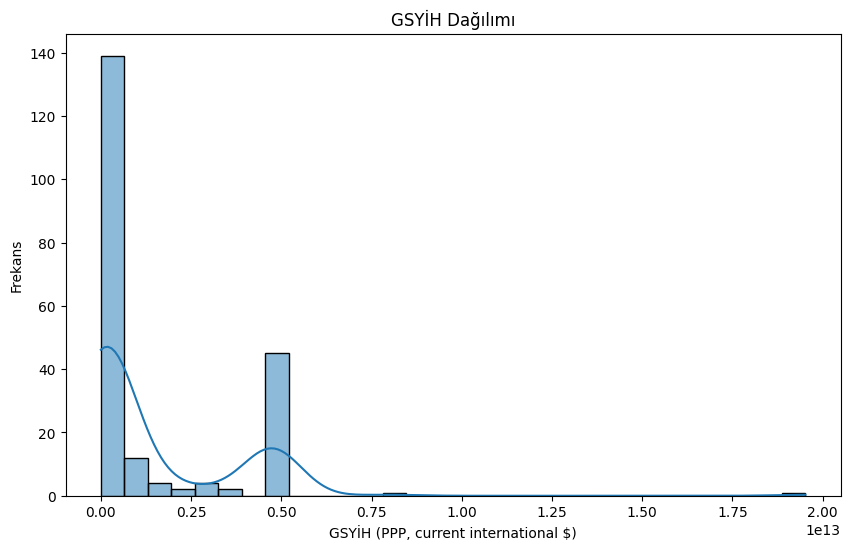

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['GDP, PPP (current international $)'], bins=30, kde=True)
plt.title("GSYİH Dağılımı")
plt.xlabel("GSYİH (PPP, current international $)")
plt.ylabel("Frekans")
plt.show()

Nüfus ve GSYİH İlişkisi


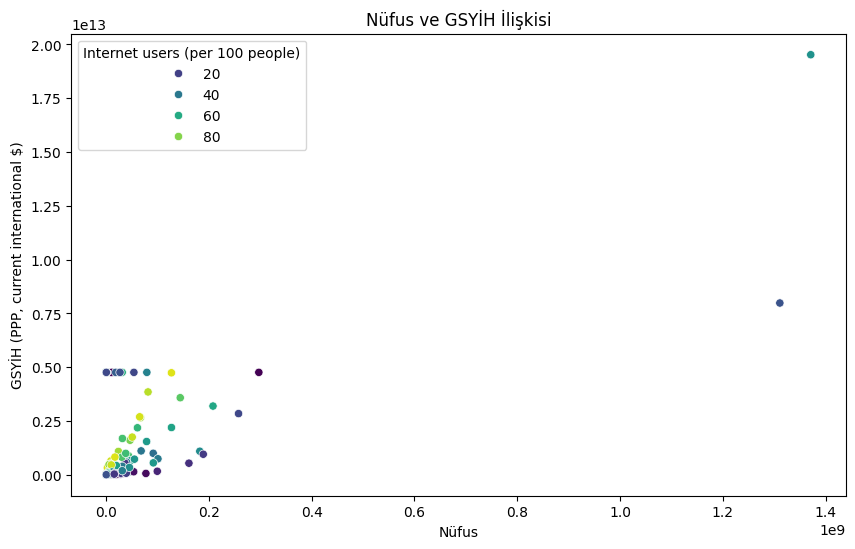

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population, total', y='GDP, PPP (current international $)', data=df, hue='Internet users (per 100 people)', palette='viridis')
plt.title("Nüfus ve GSYİH İlişkisi")
plt.xlabel("Nüfus")
plt.ylabel("GSYİH (PPP, current international $)")
plt.show()

 Okuryazarlık Oranı ve İnternet Kullanımı İlişkisi


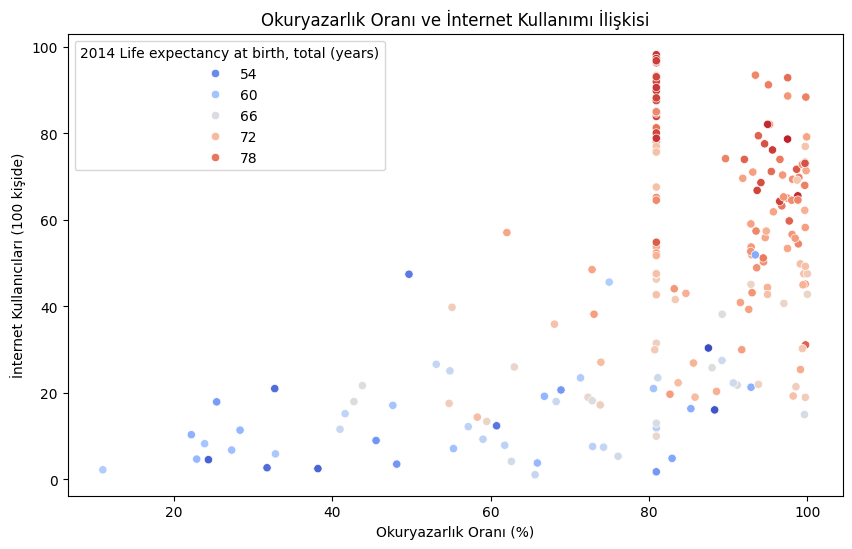

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Literacy rate, adult female (% of females ages 15 and above)', y='Internet users (per 100 people)', data=df, hue='2014 Life expectancy at birth, total (years)', palette='coolwarm')
plt.title("Okuryazarlık Oranı ve İnternet Kullanımı İlişkisi")
plt.xlabel("Okuryazarlık Oranı (%)")
plt.ylabel("İnternet Kullanıcıları (100 kişide)")
plt.show()


Sayısal sütunlar arasındaki ilişkiyi korelasyon matrisi ile inceleyelim:

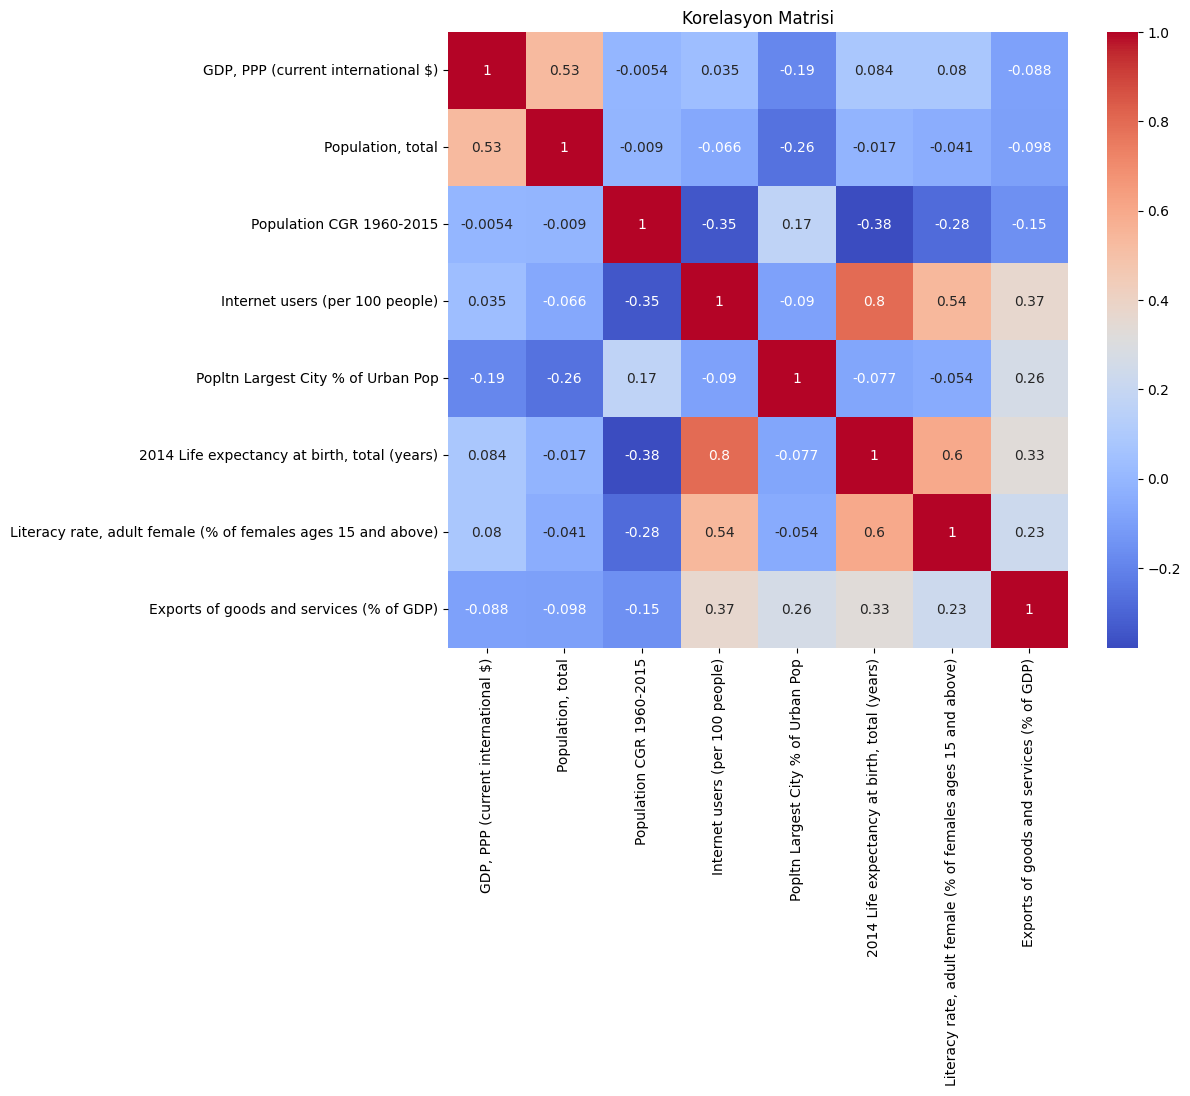

In [ ]:
# Korelasyon matrisi
corr_matrix = df[numeric_columns].corr()

# Heatmap ile görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()

 İleri Analizler
**kalın metin**Veri setinizdeki sütunlar üzerinden daha detaylı analizler yapabilirsiniz.
Örnek:En Yüksek GSYİH'ya Sahip Ülkeler

In [ ]:
top_10_gdp = df.sort_values(by='GDP, PPP (current international $)', ascending=False).head(10)
print(top_10_gdp[['Country Name', 'GDP, PPP (current international $)']])

              Country Name  GDP, PPP (current international $)
38                   China                        1.952435e+13
106                  India                        7.982528e+12
9           American Samoa                        4.758335e+12
43                 Comoros                        4.758335e+12
53                Djibouti                        4.758335e+12
47                    Cuba                        4.758335e+12
90                    Guam                        4.758335e+12
76   Micronesia, Fed. Sts.                        4.758335e+12
83             Gambia, The                        4.758335e+12
81               Gibraltar                        4.758335e+12


En Yüksek Okuryazarlık Oranına Sahip Ülkeler

In [ ]:
top_10_literacy = df.sort_values(by='Literacy rate, adult female (% of females ages 15 and above)', ascending=False).head(10)
print(top_10_literacy[['Country Name', 'Literacy rate, adult female (% of females ages 15 and above)']])

                  Country Name  \
191  Korea, Dem. People’s Rep.   
249                 Uzbekistan   
143                     Latvia   
141                  Lithuania   
90                        Guam   
68                     Estonia   
117                 Kazakhstan   
47                        Cuba   
245                    Ukraine   
231                 Tajikistan   

     Literacy rate, adult female (% of females ages 15 and above)  
191                                          99.999031             
249                                          99.995827             
143                                          99.907707             
141                                          99.841331             
90                                           99.804810             
68                                           99.804703             
117                                          99.773140             
47                                           99.768219             
245          

İnternet Kullanımı ve Yaşam Beklentisi İlişkisi

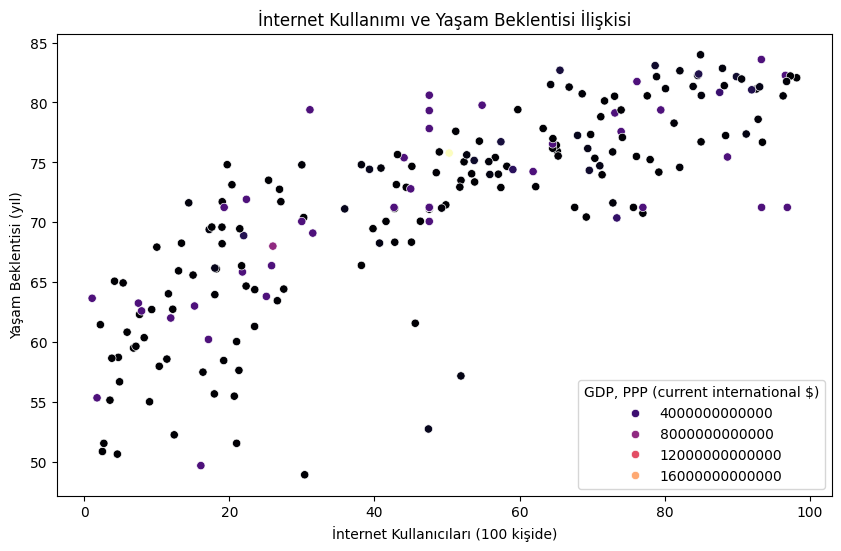

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Internet users (per 100 people)', y='2014 Life expectancy at birth, total (years)', data=df, hue='GDP, PPP (current international $)', palette='magma')
plt.title("İnternet Kullanımı ve Yaşam Beklentisi İlişkisi")
plt.xlabel("İnternet Kullanıcıları (100 kişide)")
plt.ylabel("Yaşam Beklentisi (yıl)")
plt.show()


Analiz sonuçlarını kaydetmek isterseniz, aşağıdaki komutla yeni bir CSV veya Excel dosyası oluşturabilirsiniz:

In [ ]:
# CSV olarak kaydetme
df.to_csv('/content/analyzed_data.csv', index=False)

# Excel olarak kaydetme
df.to_excel('/content/analyzed_data.xlsx', index=False)

## 📂 Veri Kaynağı  
- [2015 World Bank Data](https://www.worldbank.org/)  

## 📊 Ana Bulgular  
- GSYİH dağılımı sağa çarpık.  
- İnternet kullanımı yüksek olan ülkelerde yaşam beklentisi daha yüksek.  

## ⚠️ Limitasyonlar  
- Eksik veri stratejisi basitleştirilmiş.  
- Sütun isimleri standardize edilmemiş.  